In [1]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
from sklearn import metrics
import matplotlib.pyplot as plt

/Users/sheuli/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
'''
P8_X_train = np.loadtxt("P8_Train.csv", delimiter=",")
P8_X_test=np.loadtxt("P8_Test.csv", delimiter=",")
P8_y_train=np.loadtxt("P8_Trainlabel.csv", delimiter=",")
P8_y_test=np.loadtxt("P8_Testlabel.csv", delimiter=",")

'''

P10_X_train = np.loadtxt("Train.csv", delimiter=",")
P10_X_test=np.loadtxt("Test.csv", delimiter=",")
P10_y_train=np.loadtxt("Trainlabel.csv", delimiter=",")
P10_y_test=np.loadtxt("Testlabel.csv", delimiter=",")


In [3]:
X_train=P10_X_train
y_train=P10_y_train

X_test=P10_X_test
y_test=P10_y_test

In [4]:
'''
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
'''

'\nscaler = MinMaxScaler()\nx_train = scaler.fit_transform(X_train)\nx_test = scaler.transform(X_test)\n'

In [5]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [6]:
# LightGBM のハイパーパラメータ
lgbm_params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
}

In [7]:
# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's auc: 0.884972
[2]	valid_0's auc: 0.890263
[3]	valid_0's auc: 0.896597
[4]	valid_0's auc: 0.899813
[5]	valid_0's auc: 0.904268
[6]	valid_0's auc: 0.904982
[7]	valid_0's auc: 0.908662
[8]	valid_0's auc: 0.911003
[9]	valid_0's auc: 0.914261
[10]	valid_0's auc: 0.922203
[11]	valid_0's auc: 0.92666
[12]	valid_0's auc: 0.929835
[13]	valid_0's auc: 0.930878
[14]	valid_0's auc: 0.932303
[15]	valid_0's auc: 0.933881
[16]	valid_0's auc: 0.936179
[17]	valid_0's auc: 0.937198
[18]	valid_0's auc: 0.937533
[19]	valid_0's auc: 0.939482
[20]	valid_0's auc: 0.939777
[21]	valid_0's auc: 0.94134
[22]	valid_0's auc: 0.942182
[23]	valid_0's auc: 0.943204
[24]	valid_0's auc: 0.943359
[25]	valid_0's auc: 0.94401
[26]	valid_0's auc: 0.944634
[27]	valid_0's auc: 0.945396
[28]	valid_0's auc: 0.945645
[29]	valid_0's auc: 0.945708
[30]	valid_0's auc: 0.945344
[31]	valid_0's auc: 0.946199
[32]	valid_0's auc: 0.94666
[33]	valid_0's auc: 0.946925
[34]	valid_0's auc: 0.947203
[35]	valid_0's auc: 0.94729

In [8]:
# 保存
model.save_model('model_Pt10.txt')

In [9]:
# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [10]:
# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9507627777777777


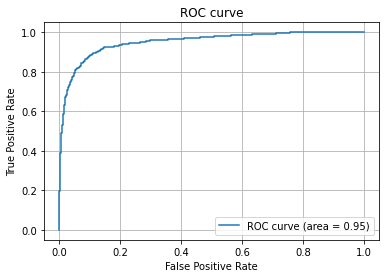

In [11]:
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [12]:
#y_pred=clf.predict(x_test)
#save the score value of Pt8
np.savetxt('p10_light_gbm_score_depen_diffmpdel.csv',y_pred, delimiter = ',')

In [13]:
y_pred.shape

(3600,)

In [14]:
#y_pred=clf.predict(x_test)

#save the result resultlabels
#convert into binary values
for i in range(0,3600):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
    
    
    
np.savetxt('p10_light_gbm_resultlabels_diffmodel.csv',y_pred, delimiter = ',')

In [15]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [16]:
cm

array([[2858,  142],
       [ 133,  467]])

In [17]:
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TP=cm[1,1]

Sensitivity=(TP/(TP+FN))*100

Specificity=(TN/(TN+FP))*100

recall=(TP/(TP+FN))

Precision = TP/(TP+FP)

Fall_out=(FP/(TN+FP))*100


Fscore=((recall*Precision)/(recall+Precision))*2

PLR=Sensitivity/Fall_out

In [18]:
#Patient 8

Sensitivity,Specificity,Fall_out,Precision, Fscore,PLR

(77.83333333333333,
 95.26666666666667,
 4.733333333333333,
 0.7668308702791461,
 0.7725392886683208,
 16.443661971830984)